In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression


import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor


df=pd.read_csv(r"C:\Users\DellWin\Downloads\Case_study_CarPrice_Assignment.csv")

In [2]:
#kiểm tra info của dữ liệu

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
#Tính toán dữ liệu tổng quan
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
#kiểm tra dữ liệu null của dữ liệu

df.isnull().sum()



car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#Tách cột Carname thành 2 cột name và brand
df[['name', 'brand']] = df['CarName'].str.split(" ", 1, expand=True)

In [6]:
##kiểm tra dữ liệu sai và sửa sai


#kiểm tra tên name của xe và phát hiện nhiều tên bị sai và điều chỉnh lại cho phù hợp
df['name'].unique()

df['name'].replace(to_replace=['maxda', 'Nissan', 'porcshce', 'toyouta','vokswagen', 'vw' ],\
                   value=['mazda','nissan','porsche','toyota','volkswagen','volkswagen'],inplace=True)



In [7]:
##Chuyển đổi dữ liệu về đúng kiểu 
df['cylindernumber'].replace(to_replace=['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],\
                   value=['4','6','5','3','12','2','8'],inplace=True)

df['doornumber'].replace(to_replace=['two', 'four'],\
                   value=['2', '4'],inplace=True)

df['cylindernumber']=df['cylindernumber'].astype(int)
df['doornumber']=df['doornumber'].astype(int)

In [8]:
#lấy các cột chứa dữ liệu dạng categorical

categorical_features = [col for col in df.columns if pd.api.types.is_string_dtype(df[col])]
print(categorical_features)

['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'name', 'brand']


In [9]:
#lấy các cột chứa dữ liệu dạng  numeric 

numerical_features = [col for col in df.columns \
                      if np.issubdtype(df[col].dtype, np.number)]
print(numerical_features)

['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


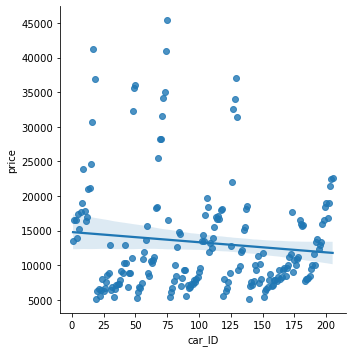

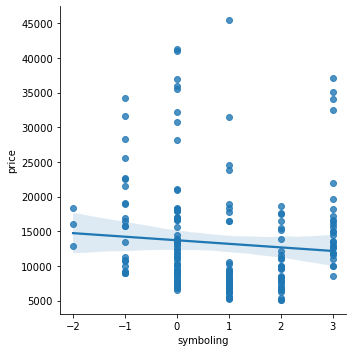

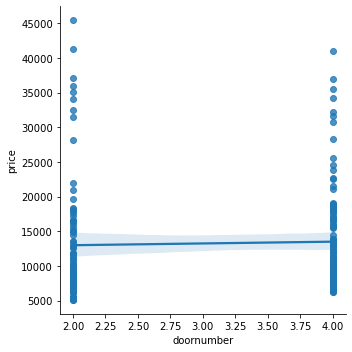

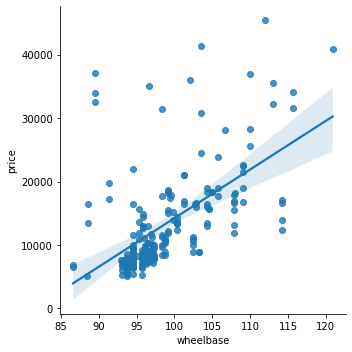

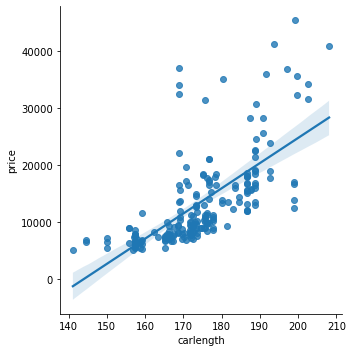

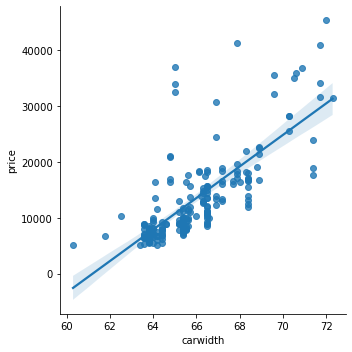

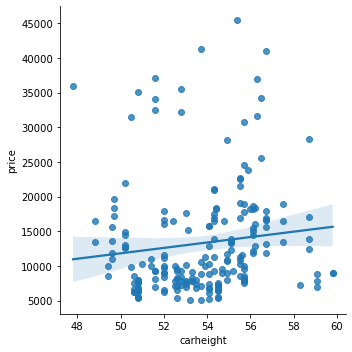

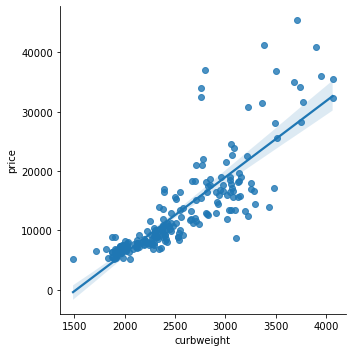

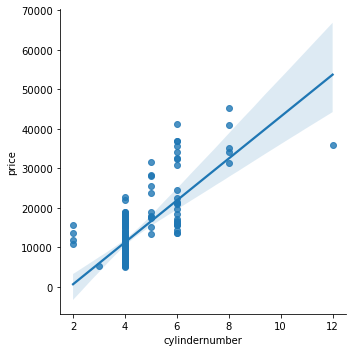

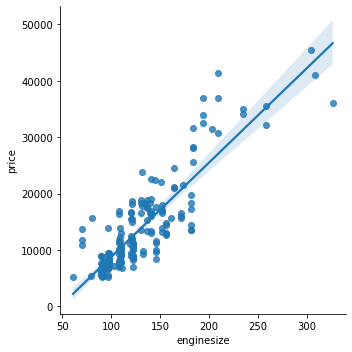

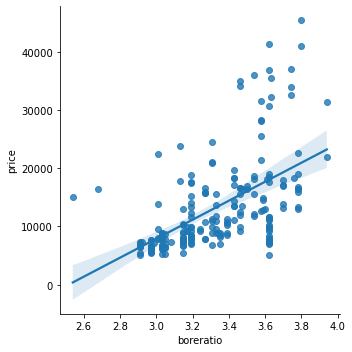

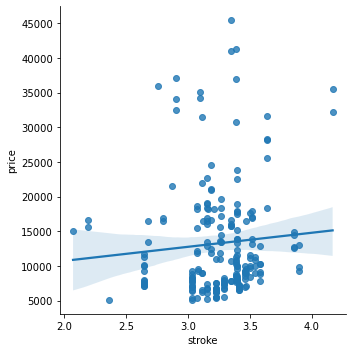

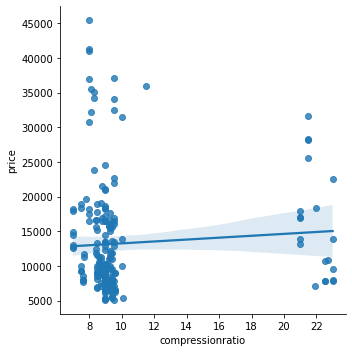

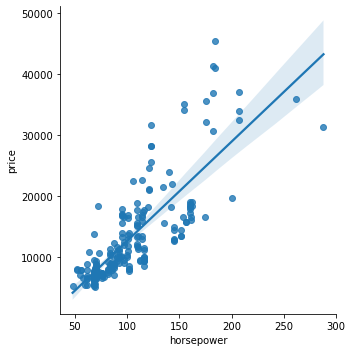

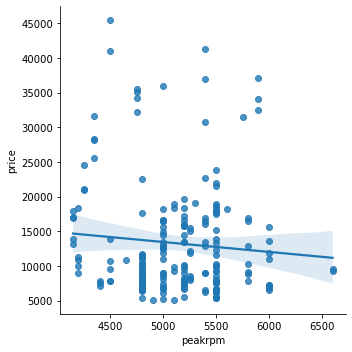

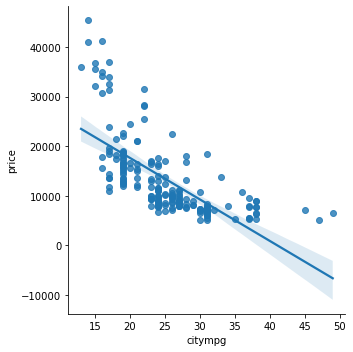

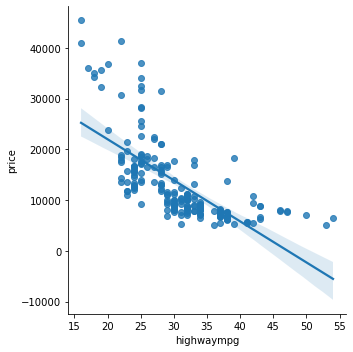

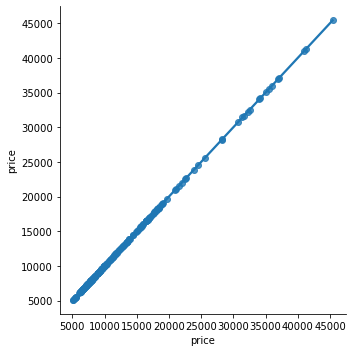

In [10]:
# Thể hiện xu hướng mối quan hệ các thuộc tính định lượng với giá cả
for col in df[numerical_features]:
    sns.lmplot(data = df[numerical_features], x= col, y = 'price')
    plt.show()

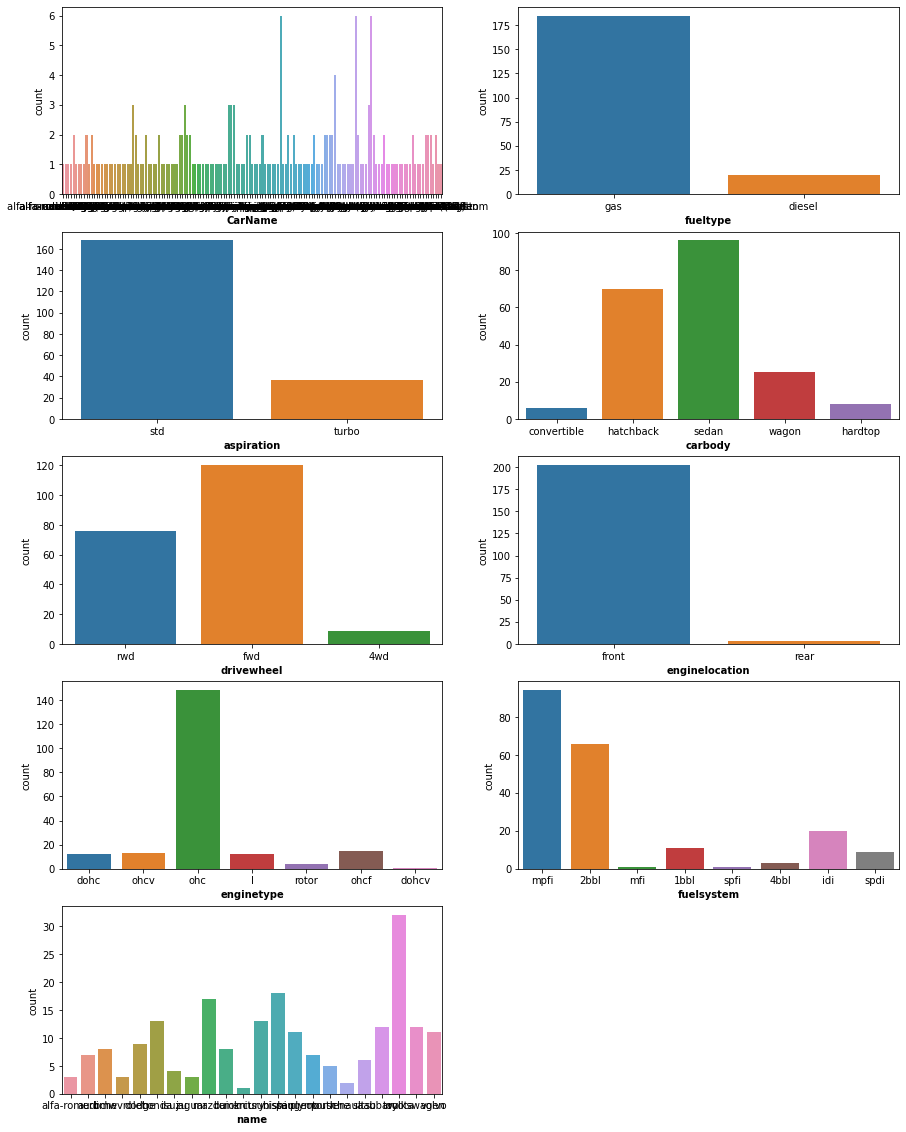

In [11]:
#Trực quan hóa các thuộc tính categrorical

plt.figure(figsize=(15,20))
for i,j in enumerate(categorical_features[:-1],start=1):
    plt.subplot(5,2,i)
    sns.countplot(x = j,data = df[categorical_features])
    plt.xlabel(j,fontweight="bold")
plt.show()
   

In [12]:
#Kiểm định các thuộc tính liên quan đến giá

from scipy.stats import pearsonr

correlated_features = []
non_correlated_features = []

for feature in numerical_features:
    # Tính giá trị Pearson's correlation coefficient và p-value
    r, p = pearsonr(df[feature], df["price"])
    
    # In kết quả
    print("Correlation coefficient between '{}' and 'price': {:.4f} (p = {:.4f})".format(feature, r, p))
    
    # Nếu p < 0.05, ta có thể từ chối giả thuyết ban đầu về không có sự tương quan giữa thuộc tính và "price"
    if p < 0.05:
        print("Có sự tương quan giữa '{}' và 'price'\n".format(feature))
        correlated_features.append(feature)
    else:
        #print("Không có sự tương quan giữa '{}' và 'price'\n".format(feature))
        non_correlated_features.append(feature)
        
print("\nNhững thuộc tính liên quan đến giá:")
print(correlated_features)

print("\nNhững thuộc tính không liên quan đến giá:")
print(non_correlated_features)


Correlation coefficient between 'car_ID' and 'price': -0.1091 (p = 0.1195)
Correlation coefficient between 'symboling' and 'price': -0.0800 (p = 0.2543)
Correlation coefficient between 'doornumber' and 'price': 0.0318 (p = 0.6504)
Correlation coefficient between 'wheelbase' and 'price': 0.5778 (p = 0.0000)
Có sự tương quan giữa 'wheelbase' và 'price'

Correlation coefficient between 'carlength' and 'price': 0.6829 (p = 0.0000)
Có sự tương quan giữa 'carlength' và 'price'

Correlation coefficient between 'carwidth' and 'price': 0.7593 (p = 0.0000)
Có sự tương quan giữa 'carwidth' và 'price'

Correlation coefficient between 'carheight' and 'price': 0.1193 (p = 0.0883)
Correlation coefficient between 'curbweight' and 'price': 0.8353 (p = 0.0000)
Có sự tương quan giữa 'curbweight' và 'price'

Correlation coefficient between 'cylindernumber' and 'price': 0.7183 (p = 0.0000)
Có sự tương quan giữa 'cylindernumber' và 'price'

Correlation coefficient between 'enginesize' and 'price': 0.8741 (p

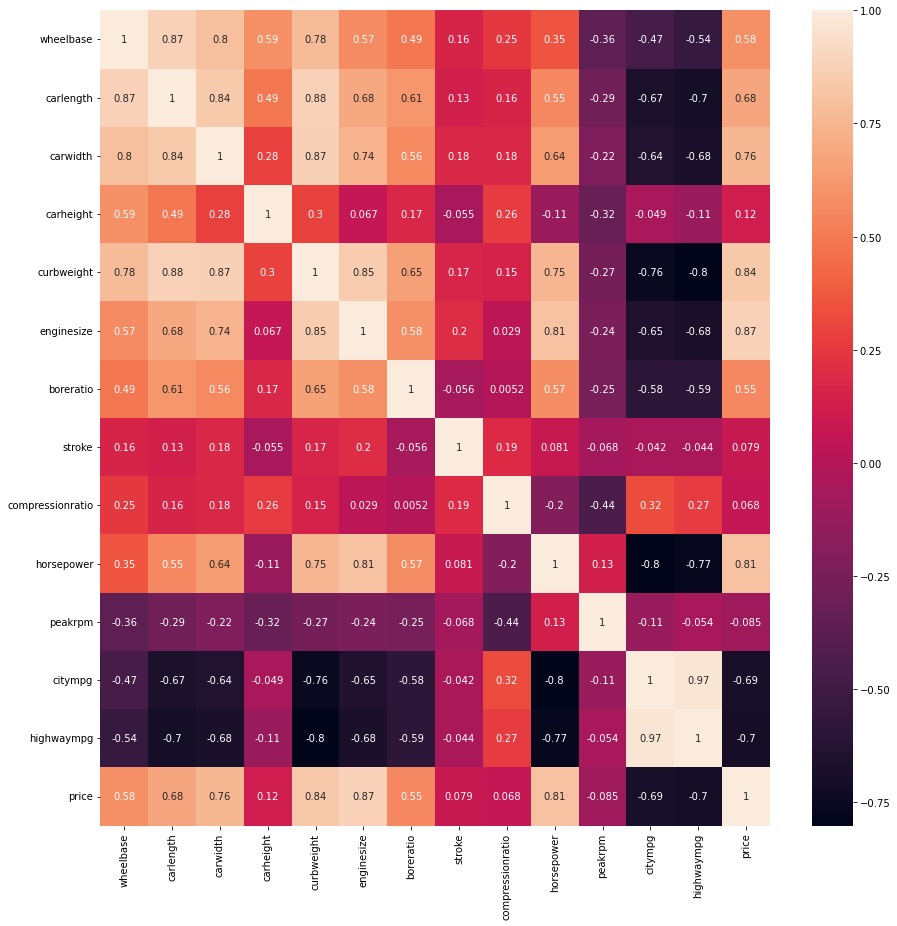

In [13]:
#Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng

from matplotlib import pyplot as plt
import seaborn as sns

corr_fields = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
qtt = df.loc[:, corr_fields]
plt.figure(figsize=(15,15))
sns.heatmap(qtt.corr(), annot=True)
plt.show()


In [14]:
#Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu
#Mã hóa
df2=df.drop(['car_ID','CarName'],axis=1)
df3=pd.get_dummies(df2)


#Correlation của price
df_price=df3.iloc[:,1:].corr().price.to_frame()
df_price


#Lấy các thuộc tính có độ tương quan với price >0.3
cate=[]
for i in range(0,67,1):
    if abs(df_price.iloc[i,0]) > 0.3:
        if df_price.index[i] != 'price':
            cate.append(df_price.index[i])
cate



['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_ohc',
 'enginetype_ohcv',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi',
 'name_bmw',
 'name_buick',
 'name_jaguar',
 'name_porsche']

In [15]:
label_encoder = LabelEncoder()
obj = (df.dtypes == 'object')
for obj in list(obj[obj].index):
    df[obj] = label_encoder.fit_transform(df[obj])
    
s_scaler = StandardScaler()
sdata = s_scaler.fit_transform(df)
col_names = list(df.columns)
sdata = pd.DataFrame(sdata, columns=col_names)
sdata

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,name,brand
0,-1.723622,1.743470,-1.838221,0.328798,-0.469295,-1.130388,-3.050975,1.213330,-0.121867,-1.690772,...,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391,-1.945332,0.273735
1,-1.706724,1.743470,-1.813780,0.328798,-0.469295,-1.130388,-3.050975,1.213330,-0.121867,-1.690772,...,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461,-1.945332,1.372084
2,-1.689826,0.133509,-1.862662,0.328798,-0.469295,-1.130388,-0.717207,1.213330,-0.121867,-0.708596,...,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461,-1.945332,-0.974389
3,-1.672928,0.938490,-1.789339,0.328798,-0.469295,0.884652,0.449677,-0.589081,-0.121867,0.173698,...,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485,-1.785879,-1.673338
4,-1.656029,0.938490,-1.764897,0.328798,-0.469295,0.884652,0.449677,-2.391492,-0.121867,0.107110,...,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668,-1.785879,-1.648376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,1.510231,0.328798,-0.469295,0.884652,0.449677,1.213330,-0.121867,1.721873,...,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752,1.403191,-1.548526
201,1.672928,-1.476452,1.485790,0.328798,2.130854,0.884652,0.449677,1.213330,-0.121867,1.721873,...,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810,1.403191,-1.573489
202,1.689826,-1.476452,1.534673,0.328798,-0.469295,0.884652,0.449677,1.213330,-0.121867,1.721873,...,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983,1.403191,-1.523564
203,1.706724,-1.476452,1.583555,-3.041381,2.130854,0.884652,0.449677,1.213330,-0.121867,1.721873,...,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,1.153582,1.403191,-1.473639


In [16]:
#Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature selection để chọn các thuộc tính tốt nhất.
#Mô hình với các biến có pvalue <0.05 trong tương quan




X = df.loc[:, ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'wheelbase', 'boreratio', 'citympg', 'highwaympg', 'drivewheel', 'fuelsystem']]
y = df.price

# dividing data into train and test
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=7)

# standardzing the data
stds = StandardScaler()
scaler = stds.fit(x_train)
rescaledx = scaler.transform(x_train)


In [17]:
import statsmodels.api as sm

exog = sm.add_constant(rescaledx)
ols = sm.OLS(y_train, exog).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     72.45
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.07e-54
Time:                        05:21:52   Log-Likelihood:                -1556.2
No. Observations:                 164   AIC:                             3136.
Df Residuals:                     152   BIC:                             3174.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.337e+04    259.327     51.569      0.0

In [ ]:
# LinearRegression model
LR = LinearRegression()
LR.fit(rescaledx, y_train)

# RandomForestRegressor model
RF = RandomForestRegressor()
RF.fit(rescaledx, y_train)

# DecisionTreeRegressor model
DT = DecisionTreeRegressor()
DT.fit(rescaledx, y_train)

In [21]:
LR_y_pred = LR.predict(scaler.transform(x_test))
RF_y_pred = RF.predict(scaler.transform(x_test))
DT_y_pred = DT.predict(scaler.transform(x_test))

print(f'LinearRegression: r2 score: {r2_score(y_test, LR_y_pred)} - MSE: {mean_squared_error(y_test, LR_y_pred)} - RMSE: {np.sqrt(mean_squared_error(y_test, LR_y_pred))}')
print(f'RandomForestRegressor: r2 score: {r2_score(y_test, RF_y_pred)} - MSE: {mean_squared_error(y_test, RF_y_pred)} - RMSE: {np.sqrt(mean_squared_error(y_test, RF_y_pred))}')
print(f'DecisionTreeRegressor: r2 score: {r2_score(y_test, DT_y_pred)} - MSE: {mean_squared_error(y_test, DT_y_pred)} - RMSE: {np.sqrt(mean_squared_error(y_test, DT_y_pred))}')

LinearRegression: r2 score: 0.7621523672109463 - MSE: 14770685.03899466 - RMSE: 3843.264893159807
RandomForestRegressor: r2 score: 0.8489215275373247 - MSE: 9382193.578095194 - RMSE: 3063.0366596068015
DecisionTreeRegressor: r2 score: 0.8019192820106312 - MSE: 12301101.606143635 - RMSE: 3507.2926319518356


=> Kết quả so sánh r2 score cho thấy mô hình RandomForestRegressor có hiệu quả tốt nhất trên bộ dữ liệu với điểm r2 score cao nhất


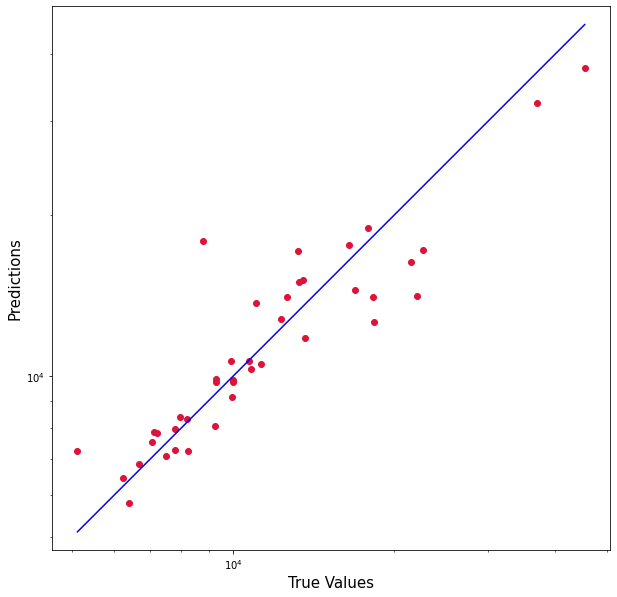

In [22]:
#Vẽ biểu đồ so sánh kết quả dự báo và bộ kết quả test

plt.figure(figsize=(10,10))
plt.scatter(y_test, RF_y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(RF_y_pred), max(y_test))
p2 = min(min(RF_y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()